# Задание 1

Для каждой задачи надо получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси). Надо найти:  
1)долю всех задержек ко всем вылетам  
2)зависимость количества задержек от длины пути, который предстоит пролететь самолёту  
3)топ 5 направлений, для которых чаще всего происходят задержки  
4)в какие времена года чаще всего происходят задержки рейсов  
5)топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы  
6)топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки  
7)необычную зависимость количества задержек от имеющихся данных

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('flight_delays.csv')

In [7]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


**1) доля задержек**

19.044 % - доля задержанных рейсов


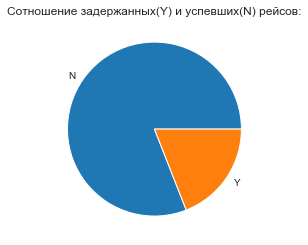

In [85]:
group = df.groupby('dep_delayed_15min')
plt.pie(group['Month'].count(), labels = df['dep_delayed_15min'].unique())
plt.title('Сотношение задержанных(Y) и успевших(N) рейсов:')
print(group['Month'].count().Y/(group['Month'].count().Y+group['Month'].count().N)*100, '% - доля задержанных рейсов')

In [31]:
group['Month'].count().shape

(2,)

**2) Задержки от пути**

In [4]:
group = df[df.dep_delayed_15min=='Y'].groupby('Distance')
dft = group.size().to_frame()
dft = pd.DataFrame({'Dist': dft.index, 'num_delay': dft.values.reshape(-1, 1).ravel()})
dft.head()

,Dist,num_delay
0,30,1
1,31,4
2,36,8
3,41,1
4,47,5


Text(0, 0.5, 'Количество задержек')

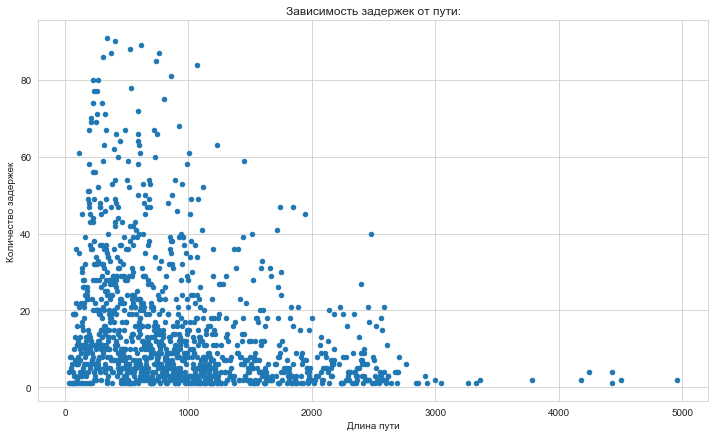

In [6]:
dft.plot.scatter(x='Dist', y='num_delay', figsize=(12,7))
plt.title('Зависимость задержек от пути:')
plt.xlabel('Длина пути')
plt.ylabel('Количество задержек')

Видим, что сильнее всего задерживаются рейсы на более короткие расстояния. Проверим: может, их просто больше?

Text(0, 0.5, 'Количество рейсов')

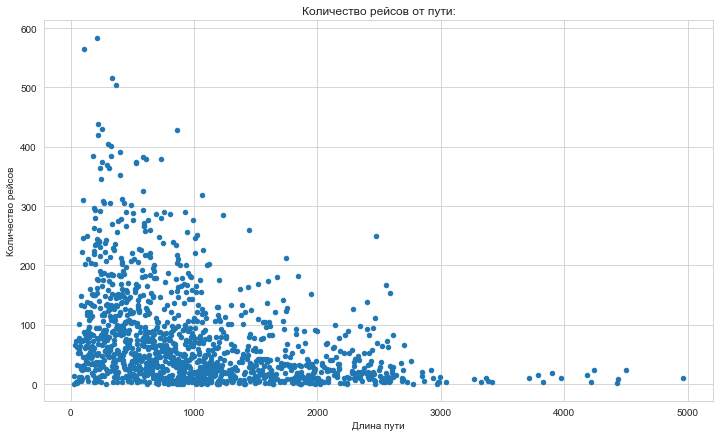

In [7]:
group = df.groupby('Distance')
dft1 = group.size().to_frame()
dft1 = pd.DataFrame({'Dist': dft1.index, 'num': dft1.values.reshape(-1, 1).ravel()})
dft1.plot.scatter(x='Dist', y='num', figsize=(12,7))
plt.title('Количество рейсов от пути:')
plt.xlabel('Длина пути')
plt.ylabel('Количество рейсов')

Да, так и есть: коротких рейсов больше. Проверим зависимость доли опозданий.

Text(0, 0.5, 'Доля задержек')

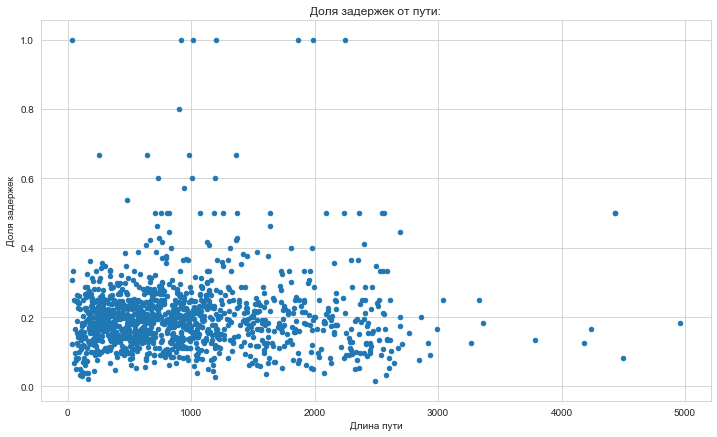

In [8]:
part = df[df.dep_delayed_15min=='Y'].groupby('Distance').size()/df.groupby('Distance').size()
part = part.dropna() #тут остались только те, кто изначально был в dft(то есть с задержкой)
dft['part'] = dft['Dist'].map(part) #вставка по ключу Dist
dft.plot.scatter(x='Dist', y='part', figsize=(12,7))
plt.title('Доля задержек от пути:')
plt.xlabel('Длина пути')
plt.ylabel('Доля задержек')

А вот тут видим, что доля задержек примерно одинакова, за исключением выбросов.

**3) топ 5 направлений с задержкой**

Направлением считаем пару Отпр-Приб. (Origin-Dest)

In [15]:
dft = df[(df.dep_delayed_15min == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()
dft.head(7)

,,0
Origin,Dest,
ATL,LGA,50
ORD,LGA,45
LAS,LAX,40
ATL,EWR,39
DFW,ORD,37
LAX,LAS,37
LGA,ORD,36


Text(0.5, 0, 'Направление')

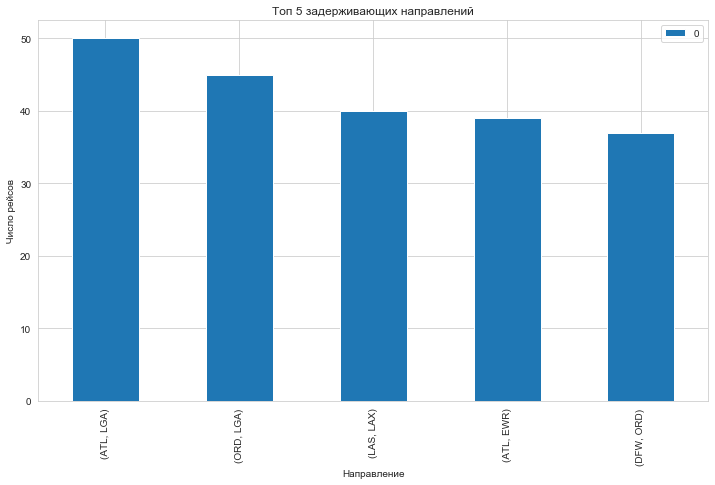

In [19]:
dft.head(5).plot(kind='bar', figsize=(12, 7))
plt.title('Топ 5 задерживающих направлений')
plt.ylabel('Число рейсов')
plt.xlabel('Направление')

**4) В какие времена года чаще всего происходят задержки рейсов**

Будем строить долю задержек, чтоб учесть колебания пассажиропотока. И для начала по месяцам, чтобы не сильно усреднялось.

In [4]:
df = df.replace({'Month': {'c-1': 'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June', 'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})
df = df.replace({'DayOfWeek': {'c-1':'Sunday', 'c-2':'Monday', 'c-3':'Tuesday', 'c-4':'Wednesday', 'c-5':'Thursday', 'c-6':'Friday', 'c-7':'Saturday'}})
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,August,c-21,Saturday,1934,AA,ATL,DFW,732,N
1,April,c-20,Tuesday,1548,US,PIT,MCO,834,N
2,September,c-2,Thursday,1422,XE,RDU,CLE,416,N
3,November,c-25,Friday,1015,OO,DEN,MEM,872,N
4,October,c-7,Friday,1828,WN,MDW,OMA,423,Y


Text(0, 0.5, 'Доля задержек')

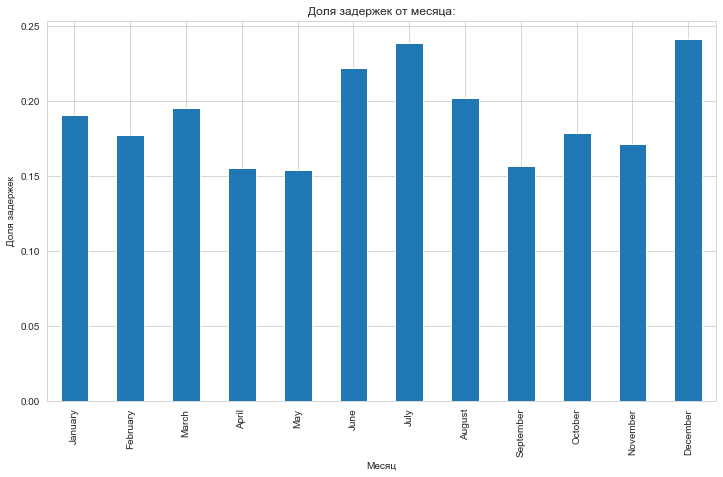

In [8]:
ser = df[df.dep_delayed_15min=='Y'].groupby('Month').size()/df.groupby('Month').size()
ser = ser.reindex(index = ['January','February','March','April','May','June','July','August','September','October','November','December'])
ser.plot(kind='bar', figsize=(12,7))
plt.title('Доля задержек от месяца:')
plt.xlabel('Месяц')
plt.ylabel('Доля задержек')

Видим, что больше всего задержек летом и в декабре-январе. Это, наверное, как-то связано с праздниками: может, нагрузка больше.

Text(0, 0.5, 'Доля задержек')

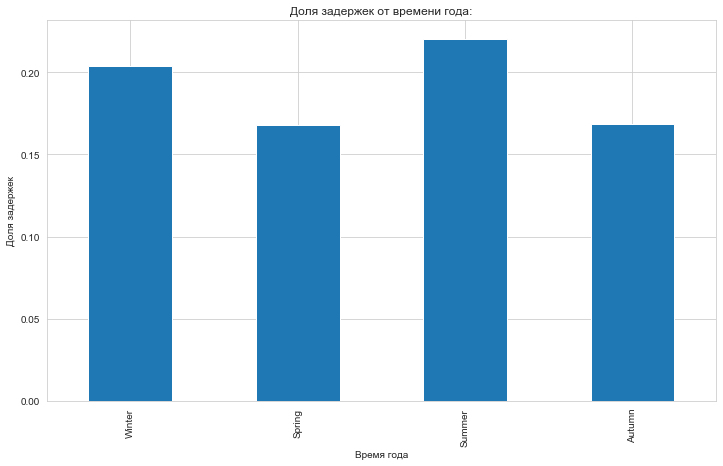

In [19]:
serY = df[df.dep_delayed_15min=='Y'].groupby('Month').size()
ser = df.groupby('Month').size()
ser_season = pd.Series([ser.December+ser.January+ser.February, ser.March+ser.April+ser.May, ser.June+ser.July+ser.August, ser.September+ser.October+ser.November], index=['Winter', 'Spring', 'Summer', 'Autumn'])
serY_season = pd.Series([serY.December+serY.January+serY.February, serY.March+serY.April+serY.May, serY.June+serY.July+serY.August, serY.September+serY.October+serY.November], index=['Winter', 'Spring', 'Summer', 'Autumn'])

(serY_season/ser_season).plot(kind='bar', figsize=(12,7))
plt.title('Доля задержек от времени года:')
plt.xlabel('Время года')
plt.ylabel('Доля задержек')

Ну, собственно, здесь то же самое видим: лето и зима.

**5) Топ 10 самых хороших перевозчиков**

Text(0, 0.5, 'Доля задержек')

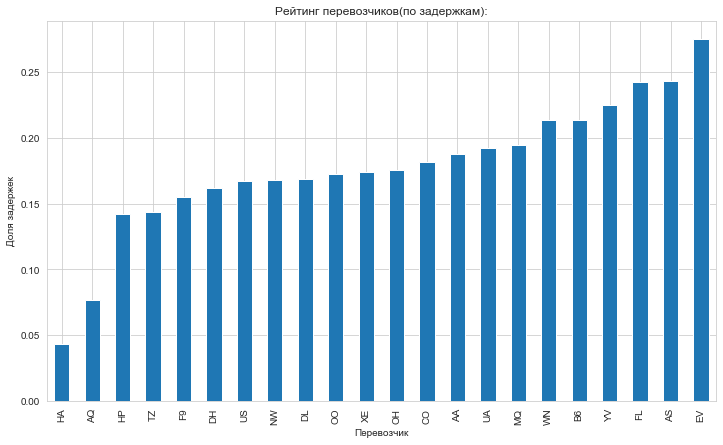

In [36]:
ser = df[df.dep_delayed_15min=='Y'].groupby('UniqueCarrier').size()/df.groupby('UniqueCarrier').size()
ser.sort_values(ascending=True).plot(kind='bar', figsize=(12,7))
plt.title('Рейтинг перевозчиков(по задержкам):')
plt.xlabel('Перевозчик')
plt.ylabel('Доля задержек')

In [34]:
print('Лучшие перевозчики с наименьшей долей задержек:')
ser.sort_values(ascending=True).head(10)

Лучшие перевозчики с наименьшей долей задержек:


UniqueCarrier
HA    0.043307
AQ    0.076923
HP    0.142235
TZ    0.143498
F9    0.155070
DH    0.161491
US    0.167387
NW    0.167890
DL    0.168922
OO    0.172801
dtype: float64

**6) топ 10 самых безответственных аэропортов**

Будем смотреть на пункт вылета и опять же на долю.

In [76]:
ser = df[df.dep_delayed_15min=='Y'].groupby('Origin').size()/df.groupby('Origin').size()
ser #показываю, что при делении не сдвигаются индексы.

Origin
ABE    0.119403
ABI    0.200000
ABQ    0.155378
ABY    0.187500
ACK    0.200000
         ...   
WRG         NaN
WYS         NaN
XNA    0.167513
YAK    0.222222
YUM    0.181818
Length: 289, dtype: float64

Text(0.5, 0, 'Доля задержек')

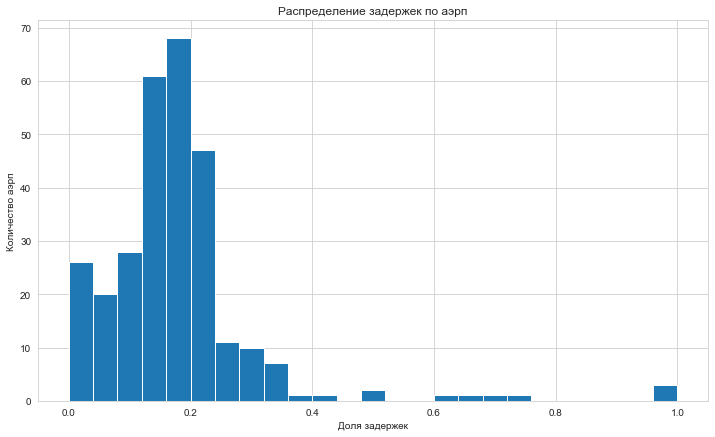

In [77]:
ser = ser.fillna(0) #если NaN, то значит его не было в статистике задержек
ser.sort_values(ascending=False).plot(kind='hist', figsize=(12,7), bins=25)
plt.title('Распределение задержек по аэрп')
plt.ylabel('Количество аэрп')
plt.xlabel('Доля задержек')

Text(0, 0.5, 'Доля задержек')

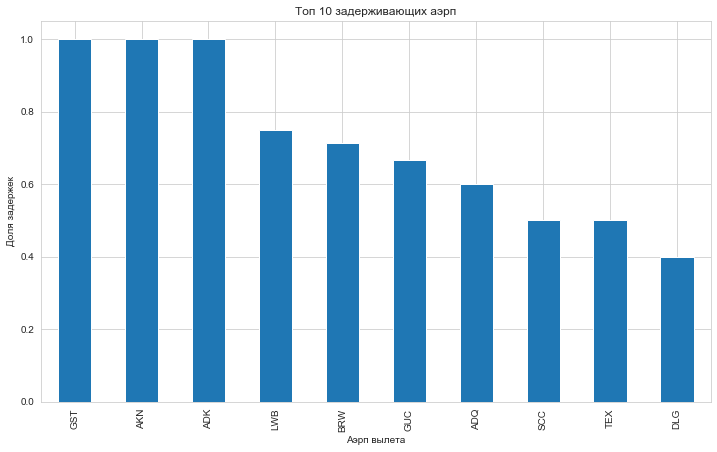

In [78]:
ser.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,7))
plt.title('Топ 10 задерживающих аэрп')
plt.xlabel('Аэрп вылета')
plt.ylabel('Доля задержек')

In [60]:
df[df.Origin=='GST']

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
16740,July,c-9,Friday,1826,AS,GST,JNU,41,Y


Странно называть безответственным аэрп, про который есть данные только про один вылет. Ограничим наши изыскания "крупными аэрп", у которых хотя бы 100 вылетов.

Text(0, 0.5, 'Доля задержек')

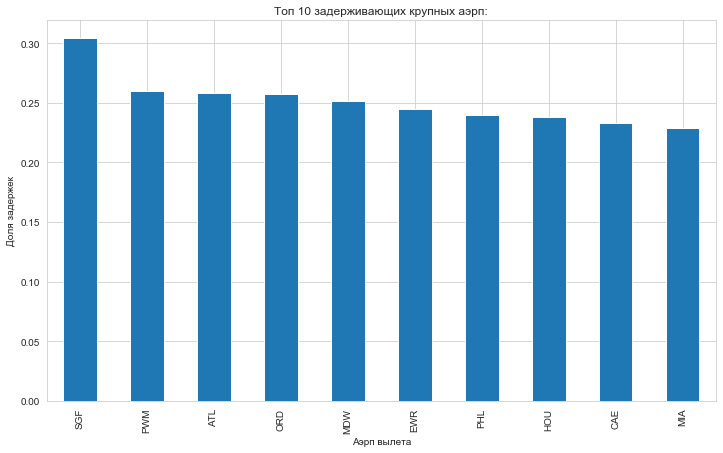

In [79]:
serY = df[df.dep_delayed_15min=='Y'].groupby('Origin').size()
ser = df.groupby('Origin').size()
serY = serY[ser>=100]
ser = ser[ser>=100]
(serY/ser).sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,7))
plt.title('Топ 10 задерживающих крупных аэрп:')
plt.xlabel('Аэрп вылета')
plt.ylabel('Доля задержек')

Ну тут частоты поприличнее: до 0.3 хотя бы. Что тоже так себе достижение, кажется.

**7) Необычная зависимость количества задержек от имеющихся данных**

Посмотрим на зависимость задержки от дня недели. $H_0$: зависимости быть не должно.

Text(0, 0.5, 'Доля задержек')

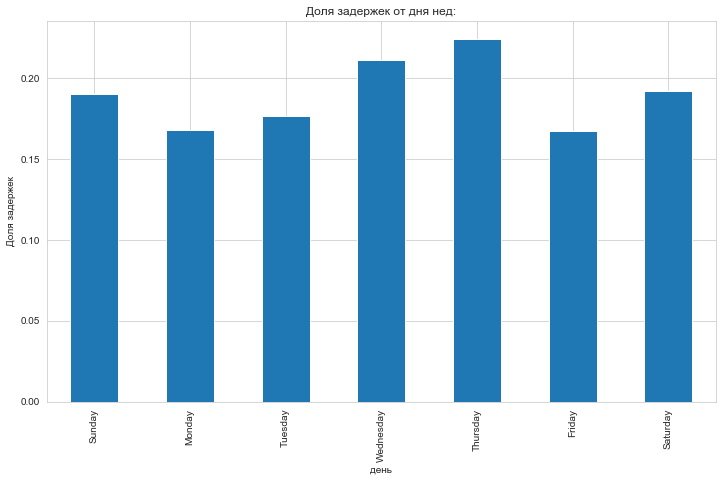

In [74]:
ser = df[df.dep_delayed_15min=='Y'].groupby('DayOfWeek').size()/df.groupby('DayOfWeek').size()
ser = ser.reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ser.plot(kind='bar', figsize=(12,7))
plt.title('Доля задержек от дня нед:')
plt.xlabel('день')
plt.ylabel('Доля задержек')

Неочевидным образом оказалось, что больше всего задержек в чт. (Возможно, это не англоязычная база, тогда у меня было неверное переименование: и надо начинать с пн, а не с вс: тогда самый задерживаемый день - пт - это может быть связано с тем, что все хотят куда-то уехать. Поэтому большая нагрузка и "запара" диспетчеров.) Проверим, посмотрев на зависимость числа рейсов от дня нед.

Text(0, 0.5, 'Всего рейсов')

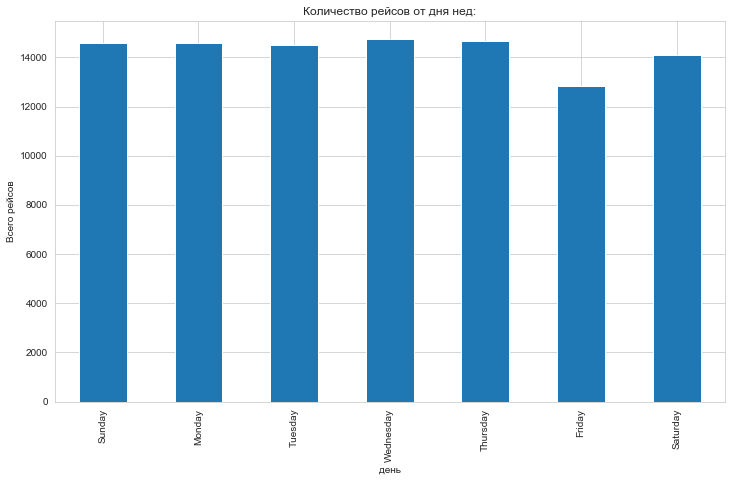

In [75]:
ser = df.groupby('DayOfWeek').size().reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ser.plot(kind='bar', figsize=(12,7))
plt.title('Количество рейсов от дня нед:')
plt.xlabel('день')
plt.ylabel('Всего рейсов')

Что ж, это не связано с количеством рейсов примерно никак. (А по тому, что рейсов в "предполагаемую мной пт" меньше всего, можно всё же судить о неправильном переименовании дней: на диаграммах следует сделать сдвиг на один день и начинать с пн - не привожу, чтобы не путать и не перегружать.) Может, конечно, различаться количество людей на одном рейсе: но это мы уже никак не проверим.